# Extracting phonems from rap-lyrics with different approaches
## The actual encoding of our phonetics happened within the phonem2vec notebook

In [1]:
import nltk
from nltk.corpus import cmudict as cmu

entries = cmu.entries() # contains tupel of (word, phonem)
arpabet = cmu.dict() # contains dict for word to phonem

### All unknown words which our phonetics lib doesn't know are saved in a set

In [2]:
unknown_words = set()

### Define functions to get phonem from word

In [3]:
def get_phonem(text):
    try:
        return arpabet[text][0]
    except:
        unknown_words.add(text)
        return text

def get_phonem_string(text):
    try:
        return "".join(arpabet[text][0])
    except:
        unknown_words.add(text)
        return ""

def get_phonem_string_spaced(text):
    try:
        return " ".join(arpabet[text][0])
    except:
        unknown_words.add(text)
        return ""

### Example of entry #50 within phonetics lexicon and the word hello

In [4]:
print("entry #50:", entries[50])
print()
# show entries for "hello"
for entry in entries:
    if entry[0] == "hello":
        print(entry)

entry #50: ('abash', ['AH0', 'B', 'AE1', 'SH'])

('hello', ['HH', 'AH0', 'L', 'OW1'])
('hello', ['HH', 'EH0', 'L', 'OW1'])


### Example of two rhyme words

In [5]:
text = "dream"
print(text, " --> ", get_phonem(text))
print(text, " --> ", get_phonem_string(text))

dream  -->  ['D', 'R', 'IY1', 'M']
dream  -->  DRIY1M


In [6]:
text2 = "scheme"
print(text2, " --> ", get_phonem(text2))
print(text2, " --> ", get_phonem_string(text2))

scheme  -->  ['S', 'K', 'IY1', 'M']
scheme  -->  SKIY1M


### Define a method which gives all possible rhyme words to a given word

In [7]:
# level represents accuracy of rhyme: take the last {level} phonems to compare
def rhyme(inp, level):
    syllables = [(word, syl) for word, syl in entries if word == inp]
    rhymes = []
    for (word, syllable) in syllables:
        rhymes += [word for word, pron in entries if pron[-level:] == syllable[-level:]]
    return list(set(rhymes))

### Shows a set of rhyming words for "scheme" for its last two phonems

In [8]:
print(get_phonem("scheme"))
print(rhyme("scheme", 2)[39:45])


['S', 'K', 'IY1', 'M']
['seam', 'steam', 'team', 'thiem', 'thieme', 'ziehm']


### Third-party library which contains functions to get phonems as well as rhymes (not 100% accurate though) <br/> that is why we didn't choose it to work with

In [9]:
import pronouncing
pronouncing.rhymes("scheme")[12:20]
#pronouncing.phones_for_word("scheme")

['deam', 'deem', 'diehm', 'diem', 'downstream', 'dream', 'esteem', 'extreme']

# Process rap lyrics to phonems

In [10]:
import tools.processing as pre
text_2pac = pre.get_text("data/cleaned-rap-lyrics/clean2_pac.txt")
text_kidcudi = pre.get_text("data/cleaned-rap-lyrics/cleankid_cudi.txt")
text_rakim = pre.get_text("data/cleaned-rap-lyrics/cleanrakim.txt")
text_2pac[:88]

'as real as it seems the american dream ; is not nothing but another calculated schemes ;'

### Tokenize cleaned text

In [11]:
default_wt = nltk.word_tokenize
words_2pac = default_wt(text_2pac)
words_kidcudi = default_wt(text_kidcudi)
words_rakim = default_wt(text_rakim)
len(words_2pac)

118932

In [12]:
print(words_2pac[:9])
print(words_kidcudi[:9])
print(words_rakim[:9])

['as', 'real', 'as', 'it', 'seems', 'the', 'american', 'dream', ';']
['jones', ';', 'we', 'born', 'to', 'die', 'for', 'real', ';']
['yeah', 'you', 'know', 'what', 'this', 'is', 'nyc', ';', 'the']


### Show the lyrics with phonem

In [13]:
for word in words_2pac[:17]:
    print(word, "\t", get_phonem_string_spaced(word))

as 	 AE1 Z
real 	 R IY1 L
as 	 AE1 Z
it 	 IH1 T
seems 	 S IY1 M Z
the 	 DH AH0
american 	 AH0 M EH1 R AH0 K AH0 N
dream 	 D R IY1 M
; 	 
is 	 IH1 Z
not 	 N AA1 T
nothing 	 N AH1 TH IH0 NG
but 	 B AH1 T
another 	 AH0 N AH1 DH ER0
calculated 	 K AE1 L K Y AH0 L EY2 T AH0 D
schemes 	 S K IY1 M Z
; 	 


### Compare word tokenization of combined phonems or spaced phonems

In [14]:
# transfer text to phonetics-text
phonem_2pac_normal = (" ").join([get_phonem_string(word) for word in words_2pac]) 
phonem_2pac = (" ").join([get_phonem_string_spaced(word) for word in words_2pac]) 

phonem_kidcudi = (" ").join([get_phonem_string_spaced(word) for word in words_kidcudi]) 
phonem_rakim = (" ").join([get_phonem_string_spaced(word) for word in words_rakim]) 

print("The first nine words:")
phonem_2pac_words = default_wt(phonem_2pac_normal)
print(phonem_2pac_words[:9])    

phonem_2pac_words_spaced = default_wt(phonem_2pac)
print(phonem_2pac_words_spaced[:9])    

The first nine words:
['AE1Z', 'RIY1L', 'AE1Z', 'IH1T', 'SIY1MZ', 'DHAH0', 'AH0MEH1RAH0KAH0N', 'DRIY1M', 'IH1Z']
['AE1', 'Z', 'R', 'IY1', 'L', 'AE1', 'Z', 'IH1', 'T']


## What to do with the unknown words?

In [15]:
len(unknown_words)

1488

In [16]:
if len(unknown_words) > 0:
    print("List of all unknown words:")
    unknown_words_list = "\n".join(list(unknown_words))
    print(unknown_words_list)
    pre.write_text("data/cleaned-rap-lyrics/unknown_words.txt", unknown_words_list)

List of all unknown words:
groupy
reanamator
toginations
gon
pictue
melodiesunmakable
archeologist
imaginate
paniced
gents
adaption
cowardass
buckin
deisel
sherm
motherfuckersdid
collaspe
bedrocks
sanging
nonplayers
jiveass
katruple
papermates
terminater
adderall
kg
excersising
effervesce
daddio
emceeing
niggas
whoridah
ogs
babygirl
ahhahahah
godson
batteram
dramacy
dawgs
dc
'
scamming
adolecsent
comming
aightaight
untill
pollitic
loins
selfdefense
threefiftysevens
blackstreets
wildass
pennys
paragraphical
mishy
dopefiends
gs
;
boldy
fearified
sixtysix
dubar
broads
baptised
skedaddle
smalltime
doublei
bootycalls
clusterfuck
hmmmmmm
sluts
flava
hypetip
rockin
whassup
existance
undertsand
callbacks
poohbutt
universual
jayz
jeapordizing
novicane
fortyfive
kurupt
bys
hos
straightass
eardrum
hooptee
zayros
fuckin
knowitall
indentification
elel
carressing
dshot
aand
hiphop
cis
illing
rrrrright
narcs
milita
spraypainting
loked
jag
plinkling
doowop
dunking
konfusion
anotha
fofifth
uhhuh
indept

### The CMU library from nltk doesn't contain all our words from the rap lyrics. We are using CMU's webtool LOGIOS Lexicon Tool (http://www.speech.cs.cmu.edu/tools/lextool.html), which uses a generative algorithm to create phonems and creates a textfile with a tupel of (word, phonem). <br/> We are creating a dict out of all unknown words with their corresponding phonems out of this textfile. 

In [17]:
# creating dict form unknown words
unknown_dict = {}
unknown_list = pre.get_text("data/cleaned-rap-lyrics/unknown_words_dict.txt")
splits = unknown_list.split("\n")
for split in splits:
    try:
        word, phonem = split.split(":")
    except:
        print(split)
    unknown_dict[word.lower()] = [phonem.split()]

In [18]:
print(len(arpabet))
print(len(unknown_dict))

123455
1190


### Merge both dictionaries into one <br/> by rerunning we would get 0 unknown words

In [19]:
# merge both dictionaries 
arpabet = {**arpabet, **unknown_dict}

# Transfer findings into own library
### We have saved all functions into one library called phonetics

In [20]:
import tools.phonetics as phon

In [21]:
phon.get_phonem("library")

['L', 'AY1', 'B', 'R', 'EH2', 'R', 'IY0']

In [22]:
phon.rhyme("library", 4)

['arbitrary', 'library']

## The first idea was to create an embedding for rhyme words so we would create a dictionary  containing target_word: [context_words] <br/> but we decided to just use phonems instead

In [23]:
#create own rhyme dict
arpabet_small = list(arpabet)[:30]
for word in arpabet_small:
    if len(nltk.corpus.wordnet.synsets(word)) > 1:
        print(word, phon.rhyme(word, 2)[:10])
        print()

a ['a.', 'ay', 'ae', 'a']

aaron ['christoffersen', 'thorton', 'newman', 'aston', 'kyllonen', 'foreman', 'cockran', 'shearon', 'paxton', 'leiman']

aarons ["institution's", 'dickens', 'inflections', 'options', "cheane's", 'ethiopians', 'ossetians', "edition's", "anyone's", 'cottons']

ab ['flab', 'knabb', 'mcnabb', 'scab', 'bee', 'bibi', 'tb', 'macnab', 'slab', 'lab']

aback ['brakke', 'krack', 'yak', 'bak', 'dac', 'bakke', 'mack', 'sac', 'haq', 'stac']

abacus ['belous', 'metropolis', 'goodness', 'petronas', 'toughness', 'maryalice', 'bulbous', 'propitious', 'deltadromeus', 'ugliness']



## Using the new defined library we created phonems out of the cleaned rap texts (which we combined into one text-file)

### We are extracting the text and feeding it into the text_to_phonem() function. During this step all unknown words are getting saved into a list. <br/> As described earlier we are using LOGIOS Lexicon Tool to get all missing phonems out of these words, by providing a text-file with a word list. <br/> The result of this operation contains a list of words with their phonems. After creating a dictionary out of them, we update the existing arpabet dictionary with this new dictionary and rerun the text_to_phonem() function. <br/> The last step reduces the number of unknown words to zero.

In [24]:
cleaned_rap_lyrics = pre.get_text("data/cleaned-rap-lyrics/final_2_pac_rakim_kid_cudi.txt")
phonem_all = phon.text_to_phonem(cleaned_rap_lyrics)

unknown_words = phon.get_unknown_words()
print("#unknown:", len(unknown_words))

if len(unknown_words) > 0:
    pre.write_text("data/cleaned-rap-lyrics/unknown_words.txt", phon.get_unkowns_as_list())
    # use logios lextool to get generated phonetics from unknown
    # http://www.speech.cs.cmu.edu/tools/lextool.html

#unknown: 1189


### A manual step is required on this website http://www.speech.cs.cmu.edu/tools/lextool.html to get the phonetics data. <br/> Save the result as "unknown_words_dict.txt".

In [25]:
if len(unknown_words) > 0:
    unknown_list = pre.get_text("data/cleaned-rap-lyrics/unknown_words_dict.txt")
    unknown_dict = phon.create_unknown_dict_from_text(unknown_list)

    phon.update_arpabet(unknown_dict)

    phonem_all = phon.text_to_phonem(cleaned_rap_lyrics) 
    unknown_words = phon.get_unknown_words()
    print("#unknown:", len(unknown_words))

pre.write_text("data/phonem-rap-lyrics/phonem_all.txt", phonem_all)

#unknown: 0


# <br/> With the new generated data we can train our embeddings on all phonetics. <br/> The following picture is the result of the training.
## It shows the related phonems to "AY0".

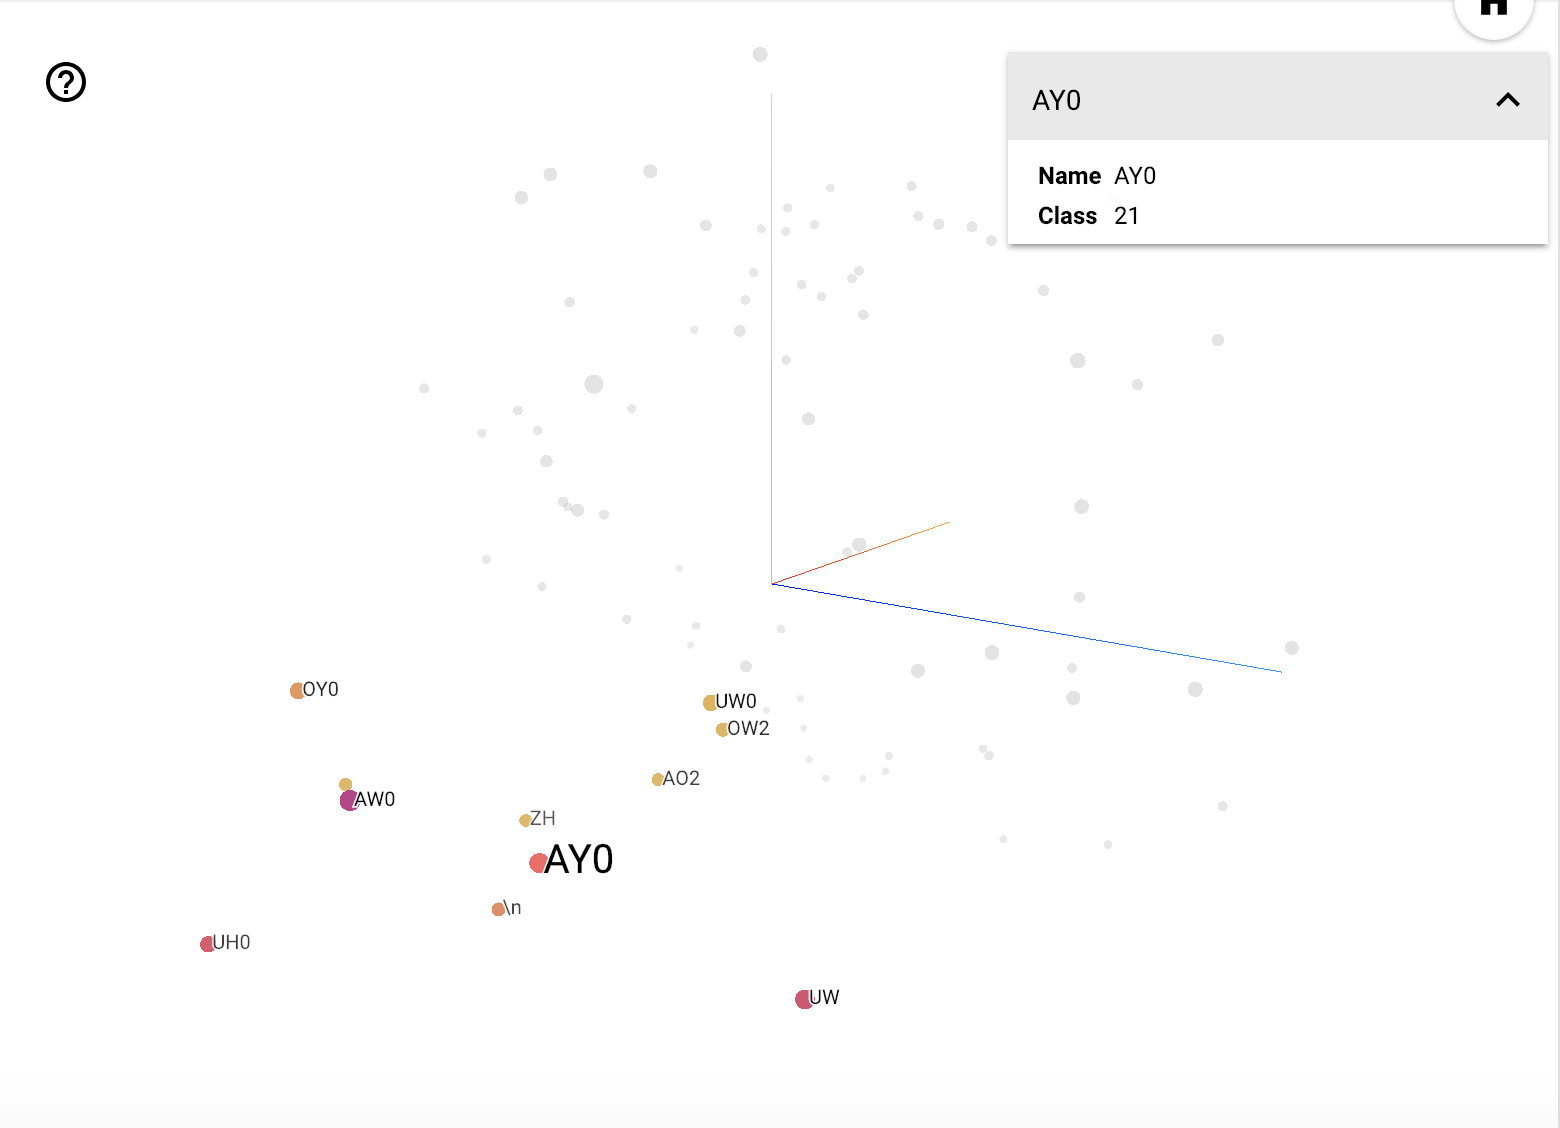